## Import modules

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import kruskal, pearsonr

## Import data

In [2]:
path_csv_daily = os.path.join(os.getcwd(), os.pardir, "data/slovenia_daily.csv")
path_csv_weekly = os.path.join(os.getcwd(), os.pardir, "data/slovenia_weekly.csv")
data_pd_daily = pd.read_csv(path_csv_daily)
data_pd_weekly = pd.read_csv(path_csv_weekly)
print("Daily coloumn values: ", data_pd_daily.columns)
print("Weekly coloumn values: ", data_pd_weekly.columns)

Daily coloumn values:  Index(['date', 'day', 'week', 'month', 'new_cases', 'new_deaths'], dtype='object')
Weekly coloumn values:  Index(['date', 'week', 'new_cases', 'new_deaths'], dtype='object')


## Plot weekly averages

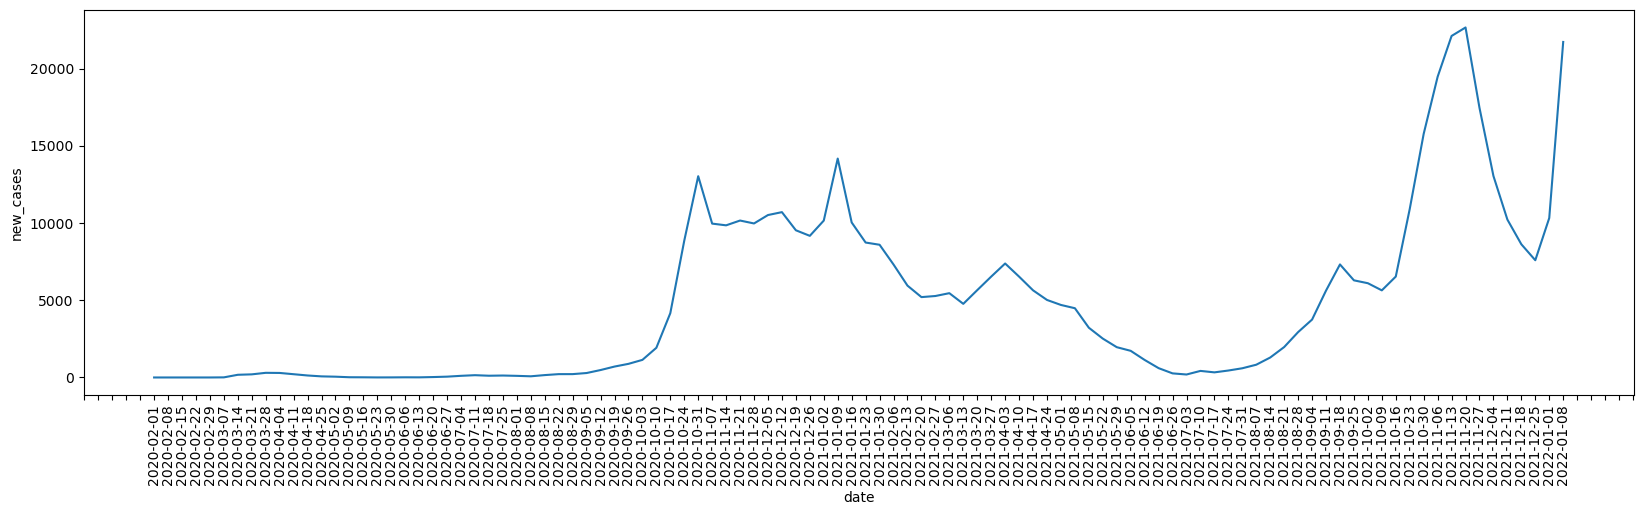

In [3]:
data_type = "weekly"
tick_spacing = 1
y_label = "new_cases"
x_label = "date"

if data_type == "daily":
    data_pd = data_pd_daily.copy()
else:
    data_pd = data_pd_weekly.copy()

date = data_pd[x_label].to_numpy()
new_cases = data_pd[y_label].to_numpy()

plt.style.use('default')
fig, ax = plt.subplots(1,1)
fig.set_size_inches(20, 5)
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.plot(date, new_cases)

## Plot daily values

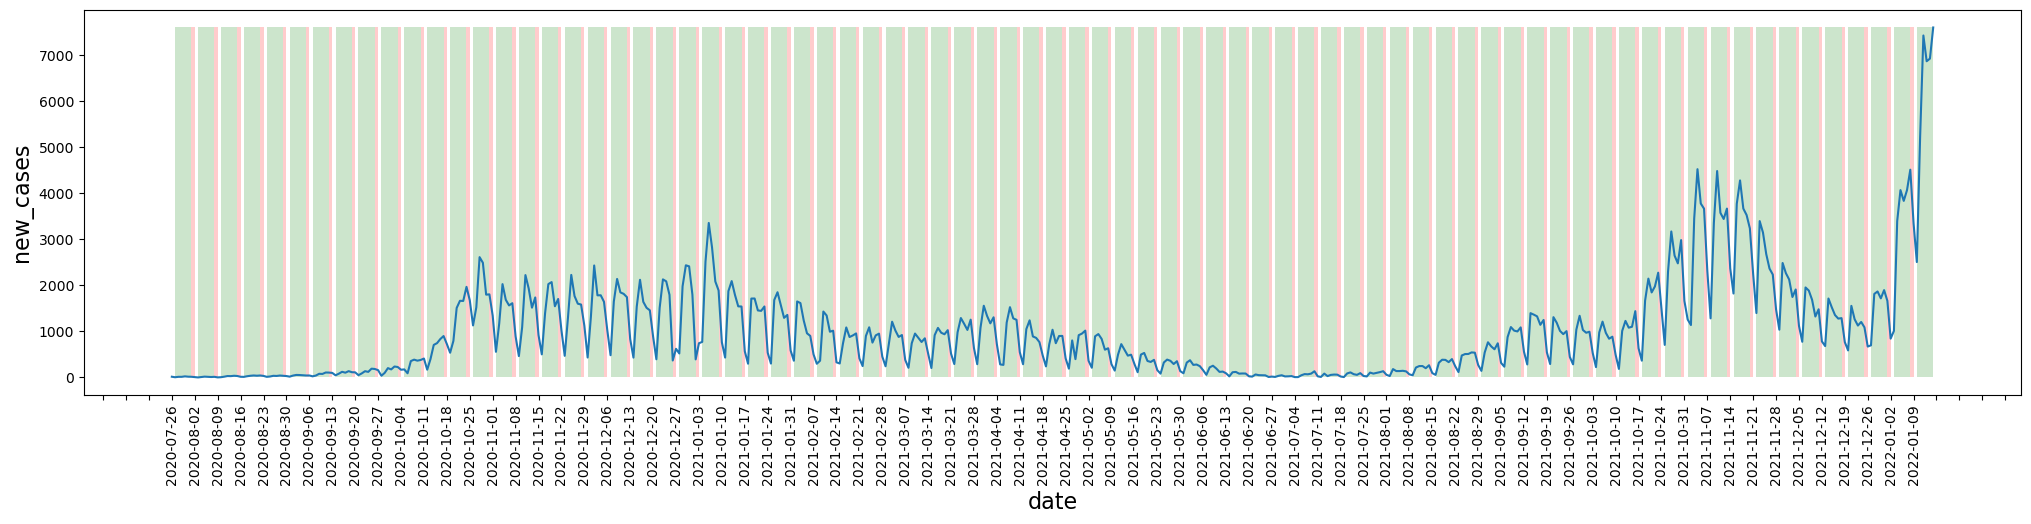

In [4]:
y_label = "new_cases"
start_date = "2020-07-26"
end_date = "2022-01-8"
tick_spacing = 7

data_pd = data_pd_daily.copy()
period_mask = (data_pd["date"] >= start_date) & (data_pd["date"] <= end_date)
data_pd = data_pd.loc[period_mask]

dates = data_pd["date"].to_numpy()
target = data_pd[y_label].to_numpy()
days = data_pd["day"].to_numpy()

plt.style.use('default')
fig, ax = plt.subplots(1,1)
fig.set_size_inches(25, 5)
plt.xticks(rotation=90)
ax.set_xlabel("date")
ax.set_ylabel(y_label)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)

y_max = np.full(len(dates), target.max())
y_min = np.full(len(dates), 0)
plt.fill_between(dates, y_min, y_max,
                days <= 6,
                facecolor='green', alpha=0.2, interpolate=False)
plt.fill_between(dates, y_min, y_max,
                days >= 6,
                facecolor='red', alpha=0.2, interpolate=False)
ax.plot(dates, target)

## Plot violins

KruskalResult(statistic=610.4517459036308, pvalue=8.922642513650419e-135)

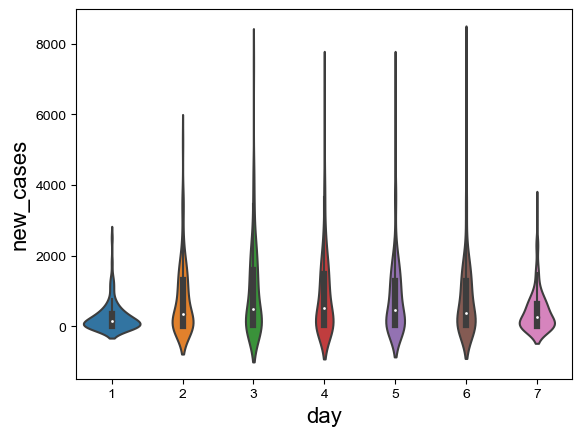

In [5]:
y_label = "new_cases"
variable = "day"
# start_date = "2020-07-26"
# end_date = "2022-01-8"

data_pd = data_pd_daily.copy()
# period_mask = (data_pd["date"] >= start_date) & (data_pd["date"] <= end_date)
# data_pd = data_pd.loc[period_mask]
plt.style.use('default')
data_pd = data_pd[[variable, y_label]]
vio = sns.violinplot(x=variable, y=y_label, data=data_pd)
vio.set_xlabel(variable,fontsize=16)
vio.set_ylabel(y_label,fontsize=16)
sns.set(rc={'figure.figsize':(10,10)})

### using the Kruskal Wallis H test for correlations between a continuous and categorical variable
kruskal(data_pd[y_label], data_pd[variable])